<h3>Ikemefula Oriaku <sup>Data Scientist</sup></h3>
<div>
<a href="https://github.com/gentleiyke" target="_blank">
    <img src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" alt="GitHub" style="width:30px;height:30px;margin-right:10px;">
</a>

<a href="https://medium.com/@gentleiyke" target="_blank">
    <img src="https://cdn.icon-icons.com/icons2/2997/PNG/512/medium_logo_icon_187624.png" alt="Medium" style="width:30px;height:30px;">
</a>

<a href="https://www.kaggle.com/gentleiyke" target="_blank">
    <img src="https://www.vectorlogo.zone/logos/kaggle/kaggle-icon.svg" alt="Kaggle" style="width:30px;height:30px;">
</a>

<a href="https://www.linkedin.com/in/gentleiyke" target="_blank">
    <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" alt="LinkedIn" style="width:30px;height:30px;">
</a>
</div>

### Comprehensive Exploratory Data Analysis (EDA) and Data Analysis on Aircraft Engine Maintenance

#### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Data Ingestion and Preprocessing

In [2]:
# Load data 
aircraft_engine_df = pd.read_csv("aircraft_engine_maintenance.csv")

# Print the first few rows of the dataset
aircraft_engine_df.head()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0


#### Handle Missing Values
##### handle missing values, outliers, and any anomalies in the dataset
##### ensure data consistency and integrity

In [3]:
# Preprocess the data
aircraft_engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        720 non-null    int64  
 1   Engine_ID         720 non-null    int64  
 2   Timestamp         720 non-null    object 
 3   Temperature       685 non-null    float64
 4   Pressure          693 non-null    float64
 5   Rotational_Speed  720 non-null    float64
 6   Engine_Health     720 non-null    float64
 7   Engine_Failure    720 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 45.1+ KB


In [4]:
# extract relevant columns from the data set 
aircraft_engine = aircraft_engine_df[[
    'Engine_ID', 'Timestamp', 'Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health', 'Engine_Failure'
]]
aircraft_engine.head()

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0


In [5]:
summary_statistics = aircraft_engine.describe()
summary_statistics

,Engine_ID,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
count,720.000000,685.000000,693.000000,720.000000,720.000000,720.000000
mean,3.000000,498.339948,119.740059,2997.446124,1.158035,0.116667
std,1.415197,49.096470,14.057048,203.755951,0.193976,0.321246
min,1.000000,356.824273,75.250630,2370.470207,0.590569,0.000000
25%,2.000000,467.160580,109.919889,2854.694306,1.022511,0.000000
50%,3.000000,498.815093,119.774723,2993.435872,1.158039,0.000000
75%,4.000000,531.952930,128.818293,3139.991527,1.288339,0.000000
max,5.000000,662.723810,167.893847,3552.492220,1.791977,1.000000


In [6]:
# Check for missing values
missing_values = aircraft_engine.isnull().sum()
missing_values

Engine_ID            0
Timestamp            0
Temperature         35
Pressure            27
Rotational_Speed     0
Engine_Health        0
Engine_Failure       0
dtype: int64

In [7]:
# Display column names with missing values
missing_values_columns = missing_values[missing_values > 0].index
print(f"Columns with missing values: {missing_values_columns}")

Columns with missing values: Index(['Temperature', 'Pressure'], dtype='object')


In [8]:
missing_values_columns
missing_columns = ["Temperature", "Pressure"]
missing_columns, missing_values_columns

(['Temperature', 'Pressure'],
 Index(['Temperature', 'Pressure'], dtype='object'))

In [9]:
# Handle missing values using mean imputation 
missing_columns = ["Temperature", "Pressure"]
aircraft_engine = aircraft_engine.fillna(aircraft_engine[missing_columns].mean())

In [10]:
# Print dataframe head
aircraft_engine.head()

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0


In [11]:
# Recheck for missing values
aircraft_engine.isnull().sum()

Engine_ID           0
Timestamp           0
Temperature         0
Pressure            0
Rotational_Speed    0
Engine_Health       0
Engine_Failure      0
dtype: int64

#### Handling Outliers

In [12]:
# select numerical columns
numerical_columns = ['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health', 'Engine_Failure']

In [13]:
# Calculate interquartile range (IQR) for numerical columns
Q1 = aircraft_engine[numerical_columns].quantile(0.25)
Q3 = aircraft_engine[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((aircraft_engine[numerical_columns] < (Q1 - 1.5 * IQR)) | 
            (aircraft_engine[numerical_columns] > (Q3 + 1.5 * IQR))
           ).any(axis=1)

# Print the number of outliers
print(f"Number of Outliers: {outliers.sum()}")

# Display the outlier records
aircraft_engine[outliers]

Number of Outliers: 109


,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
8,1,2023-01-01 01:20:00,421.754973,114.891336,3273.250992,1.040050,1
17,1,2023-01-01 02:50:00,498.339948,137.968022,2913.992901,1.564204,1
22,1,2023-01-01 03:40:00,533.635773,137.049983,3150.407616,1.791977,0
23,1,2023-01-01 03:50:00,545.395439,106.048784,2988.284581,1.209296,1
36,1,2023-01-01 06:00:00,498.292150,125.402287,2748.599809,1.550114,1
...,...,...,...,...,...,...,...
693,5,2023-01-01 19:30:00,487.653642,114.415831,3041.233395,0.825976,1
694,5,2023-01-01 19:40:00,634.832485,154.002016,3240.412844,1.216180,0
699,5,2023-01-01 20:30:00,511.092840,121.457250,3246.417977,1.174549,1
702,5,2023-01-01 21:00:00,505.252977,117.938385,2855.410729,0.966572,1


In [14]:
# Remove outliers based on IQR
aircraft_engine = aircraft_engine[~outliers]

# Display the dataset after handling outliers
aircraft_engine

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0
...,...,...,...,...,...,...,...
715,5,2023-01-01 23:10:00,421.013489,97.450729,2900.108876,1.128137,0
716,5,2023-01-01 23:20:00,471.540883,111.988270,3325.679936,1.410541,0
717,5,2023-01-01 23:30:00,539.021207,129.277527,2763.037311,1.326841,0
718,5,2023-01-01 23:40:00,525.968945,119.488649,2818.602719,0.987268,0


In [15]:
# Count dataset records
aircraft_engine.count()

Engine_ID           611
Timestamp           611
Temperature         611
Pressure            611
Rotational_Speed    611
Engine_Health       611
Engine_Failure      611
dtype: int64

#### Data Exploration

#### Univariate Analysis:

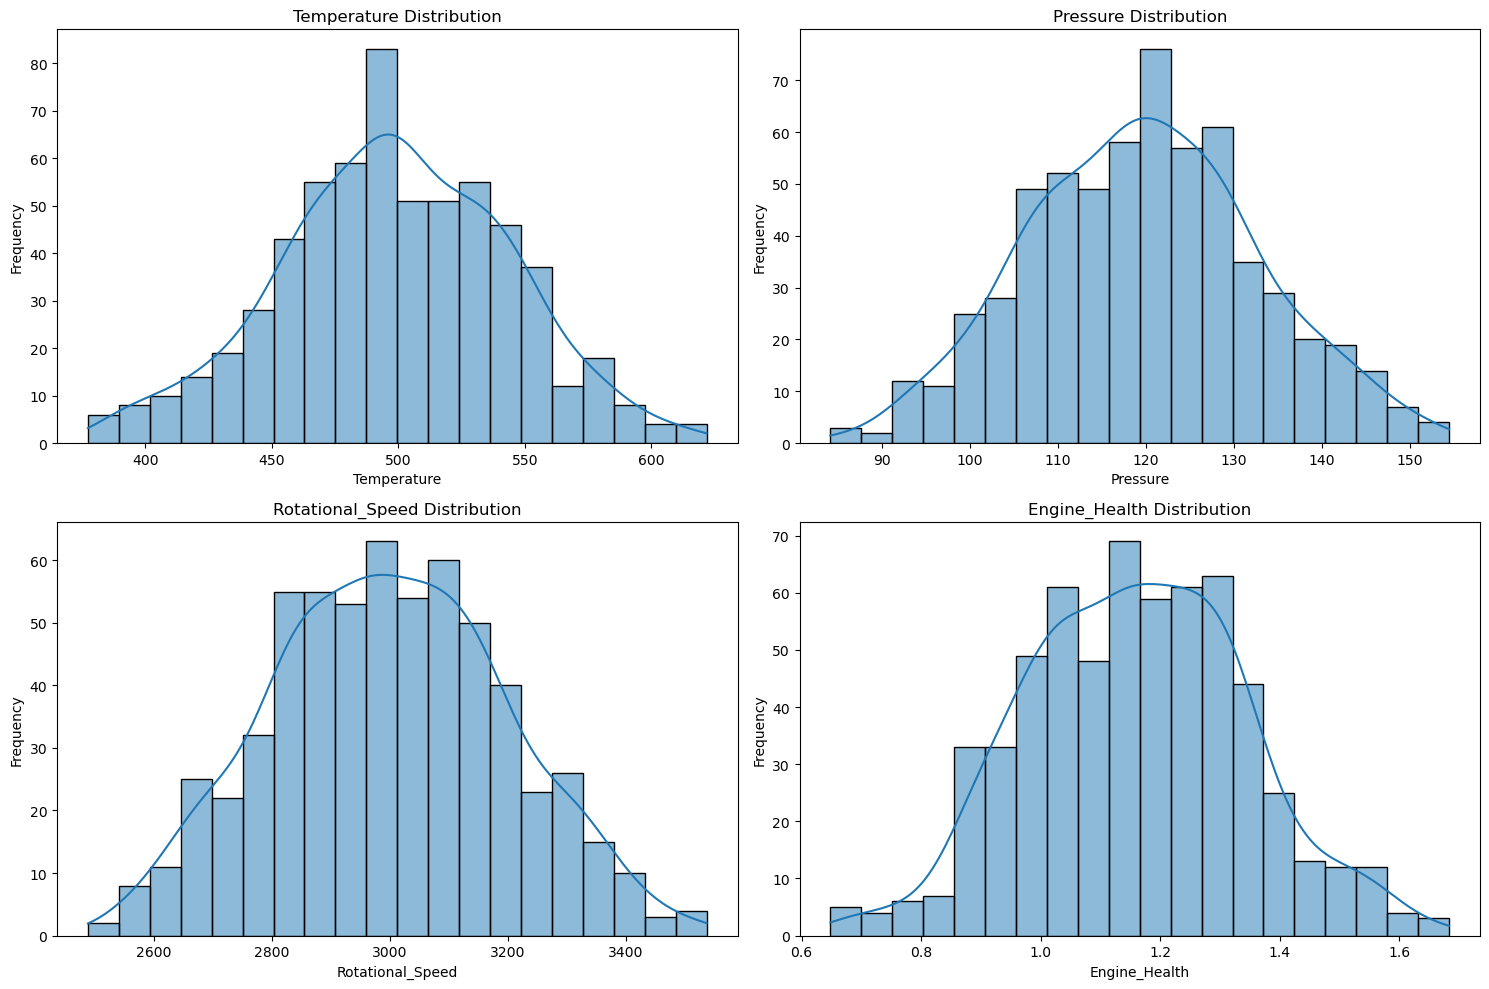

In [16]:
# Univariate analysis using Histograms
selected_columns = ["Temperature",	"Pressure",	"Rotational_Speed",	"Engine_Health"]

# Display Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(aircraft_engine[column], bins=20, kde=True)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Bivariate Analysis

In [17]:
# Add engine failure to the selected columns
new_selected_columns = selected_columns + ["Engine_Failure"]

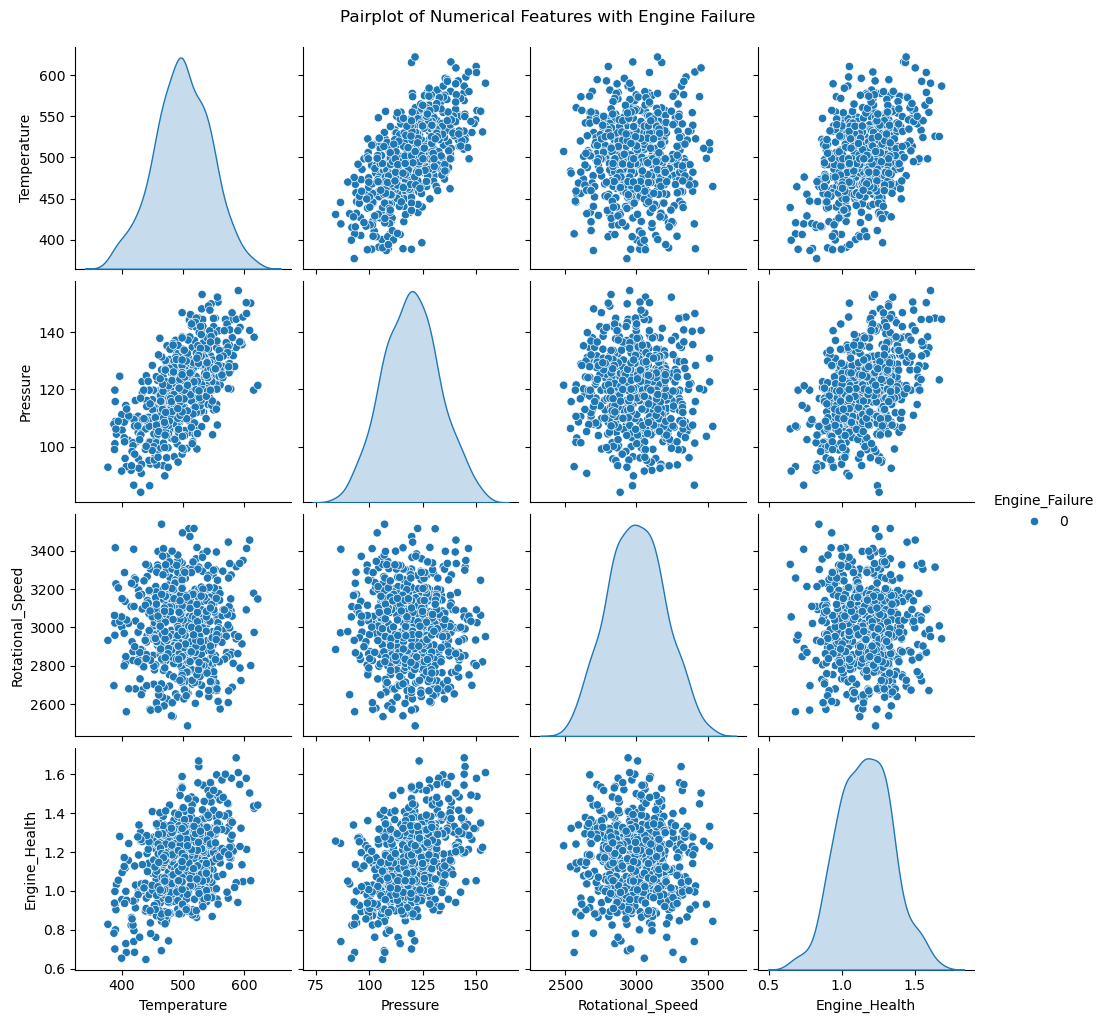

In [18]:
# Bivariate analysis using Pairplot
sns.pairplot(aircraft_engine[new_selected_columns], hue='Engine_Failure', diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features with Engine Failure", y=1.02)
plt.show()

#### Multivariate Analysis:

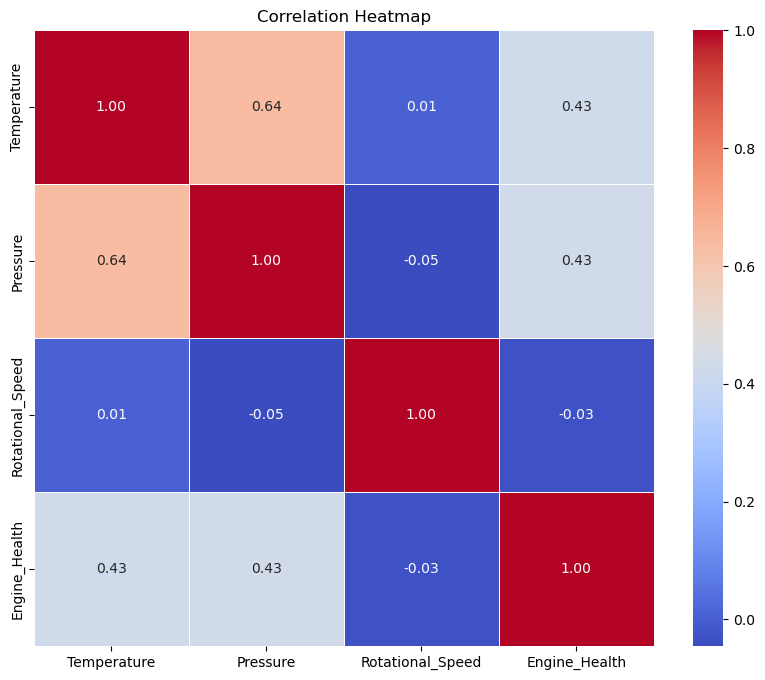

In [19]:
# Multivariate analysis using Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = aircraft_engine[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Time Series Analysis of Engine Health

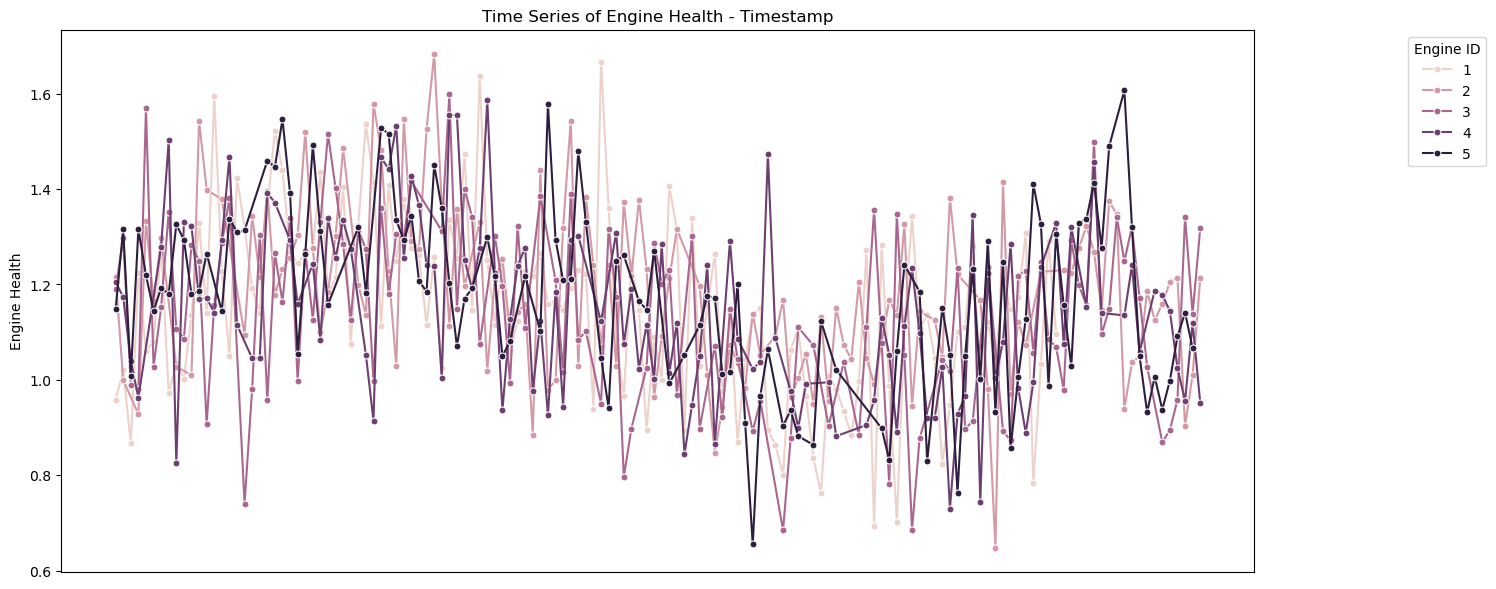

In [20]:
# Data visualization - Time Series of Engine Health
plt.figure(figsize=(15, 6))
sns.lineplot(x="Timestamp", y="Engine_Health", data=aircraft_engine, hue="Engine_ID", marker="o", markersize=5)
plt.title("Time Series of Engine Health - Timestamp")
plt.ylabel("Engine Health")
plt.legend(title="Engine ID", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### Feature Engineering

##### Create a Time-Related Feature:
##### Time-Related Feature (Hour_of_Day): Extracting the hour of the day to capture potential patterns related to specific times.

In [21]:
# Feature engineering - Extract hour of the day
aircraft_engine['Timestamp'] = pd.to_datetime(aircraft_engine['Timestamp'])
aircraft_engine['Hour_of_Day'] = aircraft_engine['Timestamp'].dt.hour
aircraft_engine['Minutes_of_Day'] = aircraft_engine['Timestamp'].dt.minute

# Display the dataset with the new feature
aircraft_engine.head(10)

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Minutes_of_Day
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,0
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,10
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,20
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,30
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,40
5,1,2023-01-01 00:50:00,473.186271,111.985134,2847.832285,1.081155,0,0,50
6,1,2023-01-01 01:00:00,549.785305,112.858185,3119.941093,1.278465,0,1,0
7,1,2023-01-01 01:10:00,473.163440,128.219441,2832.073481,0.972845,0,1,10
9,1,2023-01-01 01:30:00,391.201634,104.419981,3057.934114,1.033222,0,1,30
10,1,2023-01-01 01:40:00,427.183040,95.794830,2833.884023,1.002641,0,1,40


#### Create Rolling Averages:
##### Rolling Averages: Calculating rolling averages to smooth out noise and capture trends over time, especially relevant for time-series data.

In [22]:
# Feature engineering - Create rolling averages for 'Temperature', 'Rotational_Speed' and 'Engine_Health'
aircraft_engine['Rolling_Avg_Temperature'] = aircraft_engine.groupby('Engine_ID')['Temperature'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
aircraft_engine['Rolling_Avg_Rotational_Speed'] = aircraft_engine.groupby('Engine_ID')['Rotational_Speed'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
aircraft_engine['Rolling_Avg_Engine_Health'] = aircraft_engine.groupby('Engine_ID')['Engine_Health'].transform(lambda x: x.rolling(window=10).mean())

# Display the dataset with the new features
aircraft_engine.head(10)

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Minutes_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,0,555.153852,3049.405740,NaN
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,10,490.928375,3010.889257,NaN
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,20,485.434241,3125.840960,NaN
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,30,486.532353,3102.173750,NaN
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,40,480.433210,3110.459623,NaN
5,1,2023-01-01 00:50:00,473.186271,111.985134,2847.832285,1.081155,0,0,50,479.225387,3066.688400,NaN
6,1,2023-01-01 01:00:00,549.785305,112.858185,3119.941093,1.278465,0,1,0,489.305375,3074.295928,NaN
7,1,2023-01-01 01:10:00,473.163440,128.219441,2832.073481,0.972845,0,1,10,487.287633,3044.018122,NaN
9,1,2023-01-01 01:30:00,391.201634,104.419981,3057.934114,1.033222,0,1,30,476.611411,3045.564343,NaN
10,1,2023-01-01 01:40:00,427.183040,95.794830,2833.884023,1.002641,0,1,40,471.668574,3024.396311,1.049846


#### Binning 'Hour_of_Day':
##### Binning 'Hour_of_Day': Grouping hours into categories ('Night', 'Morning', 'Afternoon', 'Evening') to recognise patterns related to different parts of the day.

In [23]:
# Feature engineering - Binning 'Hour_of_Day'
bins = [-1, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
aircraft_engine['Part_of_Day'] = pd.cut(aircraft_engine['Hour_of_Day'], bins=bins, labels=labels, right=False)

# Display the dataset with the new feature
aircraft_engine.head(10)

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Minutes_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health,Part_of_Day
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,0,555.153852,3049.405740,NaN,Night
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,10,490.928375,3010.889257,NaN,Night
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,20,485.434241,3125.840960,NaN,Night
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,30,486.532353,3102.173750,NaN,Night
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,40,480.433210,3110.459623,NaN,Night
5,1,2023-01-01 00:50:00,473.186271,111.985134,2847.832285,1.081155,0,0,50,479.225387,3066.688400,NaN,Night
6,1,2023-01-01 01:00:00,549.785305,112.858185,3119.941093,1.278465,0,1,0,489.305375,3074.295928,NaN,Night
7,1,2023-01-01 01:10:00,473.163440,128.219441,2832.073481,0.972845,0,1,10,487.287633,3044.018122,NaN,Night
9,1,2023-01-01 01:30:00,391.201634,104.419981,3057.934114,1.033222,0,1,30,476.611411,3045.564343,NaN,Night
10,1,2023-01-01 01:40:00,427.183040,95.794830,2833.884023,1.002641,0,1,40,471.668574,3024.396311,1.049846,Night


#### Interaction Features:
##### Interaction Feature: The product of 'Temperature' and 'Rotational_Speed' creates a new feature that captures the relationship between these variables.

In [24]:
# Feature engineering - Interaction feature between Temperature and Rotational Speed
aircraft_engine['Temp_Rotational_Interaction'] = aircraft_engine['Temperature'] * aircraft_engine['Rotational_Speed']

# Display the dataset with the new feature
aircraft_engine.head(10)

,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Hour_of_Day,Minutes_of_Day,Rolling_Avg_Temperature,Rolling_Avg_Rotational_Speed,Rolling_Avg_Engine_Health,Part_of_Day,Temp_Rotational_Interaction
0,1,2023-01-01 00:00:00,555.153852,129.023571,3049.405740,0.958384,0,0,0,555.153852,3049.405740,NaN,Night,1.692889e+06
1,1,2023-01-01 00:10:00,426.702897,104.987090,2972.372774,1.019795,0,0,10,490.928375,3010.889257,NaN,Night,1.268320e+06
2,1,2023-01-01 00:20:00,474.445973,105.454510,3355.744366,0.866681,0,0,20,485.434241,3125.840960,NaN,Night,1.592119e+06
3,1,2023-01-01 00:30:00,489.826688,127.166751,3031.172120,1.225052,0,0,30,486.532353,3102.173750,NaN,Night,1.484749e+06
4,1,2023-01-01 00:40:00,456.036638,119.311479,3143.603114,1.060224,0,0,40,480.433210,3110.459623,NaN,Night,1.433598e+06
5,1,2023-01-01 00:50:00,473.186271,111.985134,2847.832285,1.081155,0,0,50,479.225387,3066.688400,NaN,Night,1.347555e+06
6,1,2023-01-01 01:00:00,549.785305,112.858185,3119.941093,1.278465,0,1,0,489.305375,3074.295928,NaN,Night,1.715298e+06
7,1,2023-01-01 01:10:00,473.163440,128.219441,2832.073481,0.972845,0,1,10,487.287633,3044.018122,NaN,Night,1.340034e+06
9,1,2023-01-01 01:30:00,391.201634,104.419981,3057.934114,1.033222,0,1,30,476.611411,3045.564343,NaN,Night,1.196269e+06
10,1,2023-01-01 01:40:00,427.183040,95.794830,2833.884023,1.002641,0,1,40,471.668574,3024.396311,1.049846,Night,1.210587e+06


#### Data Visualisation

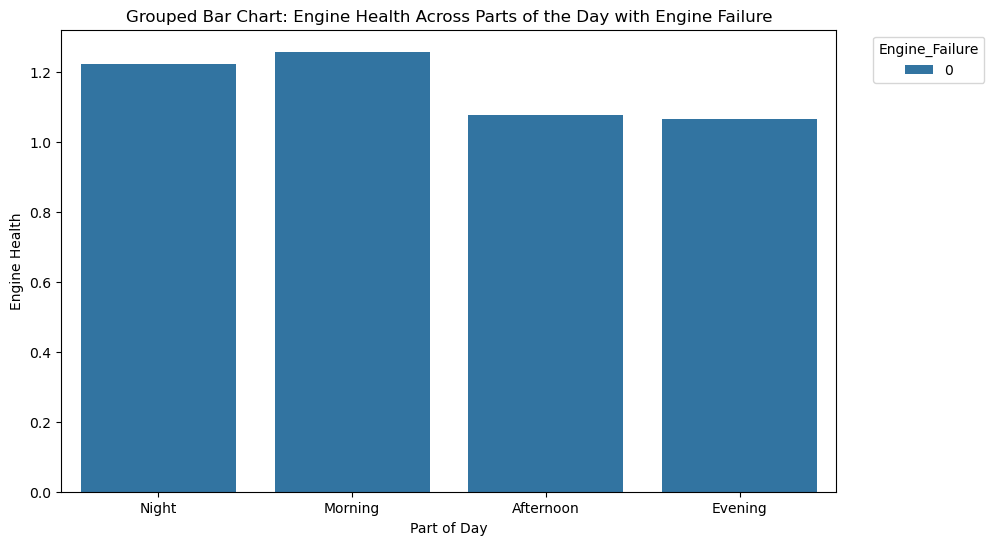

In [25]:
# Grouped Bar Chart
aircraft_engine['Engine_Failure'] = aircraft_engine['Engine_Failure'].astype(str)
aircraft_engine['Part_of_Day'] = aircraft_engine['Part_of_Day'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(x='Part_of_Day', y='Engine_Health', data=aircraft_engine, ci=None, hue='Engine_Failure')

plt.title('Grouped Bar Chart: Engine Health Across Parts of the Day with Engine Failure')
plt.xlabel('Part of Day')
plt.ylabel('Engine Health')
plt.legend(title='Engine_Failure', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

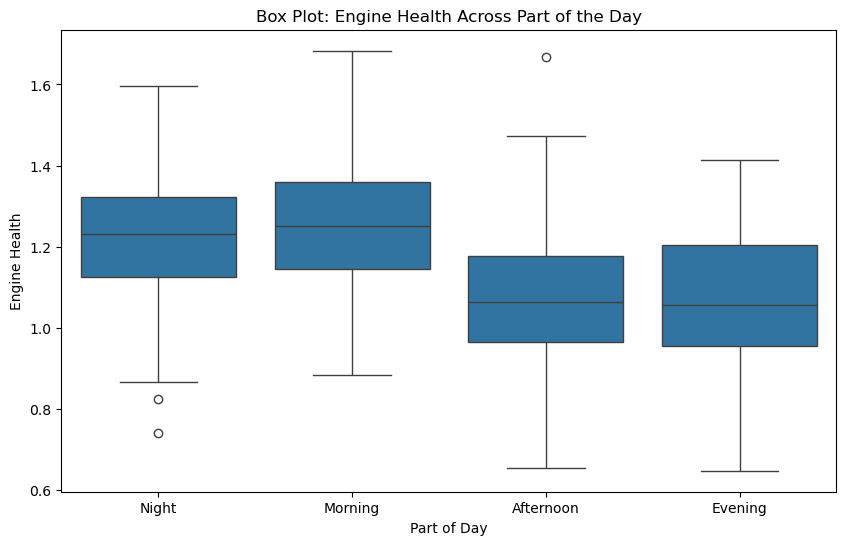

In [27]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Part_of_Day', y='Engine_Health', data=aircraft_engine)
plt.title('Box Plot: Engine Health Across Part of the Day')
plt.xlabel('Part of Day')
plt.ylabel('Engine Health')
plt.show()

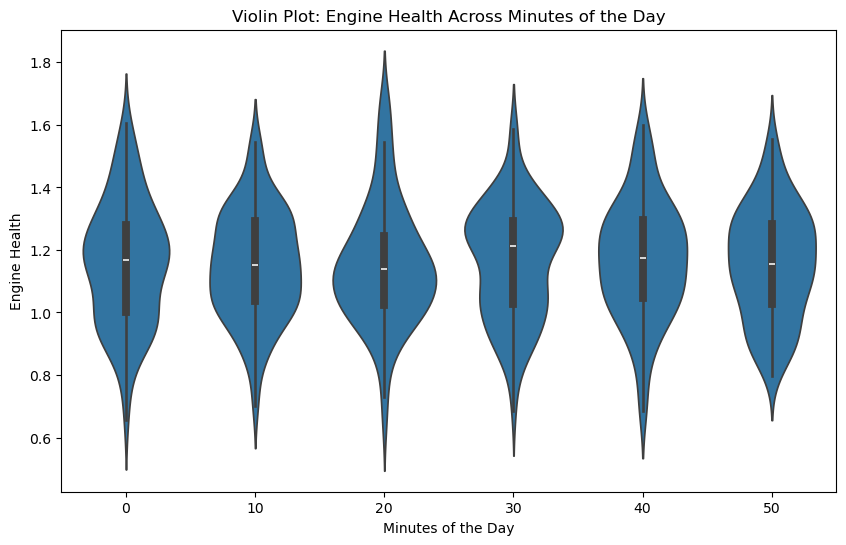

In [28]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Minutes_of_Day', y='Engine_Health', data=aircraft_engine)
plt.title('Violin Plot: Engine Health Across Minutes of the Day')
plt.xlabel('Minutes of the Day')
plt.ylabel('Engine Health')
plt.show()

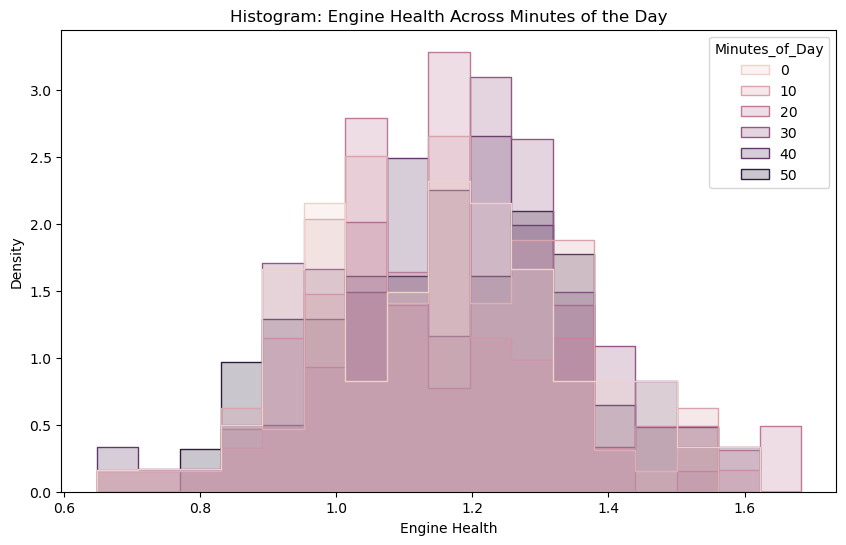

In [29]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='Engine_Health', hue='Minutes_of_Day', data=aircraft_engine, element="step", stat="density", common_norm=False)
plt.title('Histogram: Engine Health Across Minutes of the Day')
plt.xlabel('Engine Health')
plt.ylabel('Density')
plt.show()

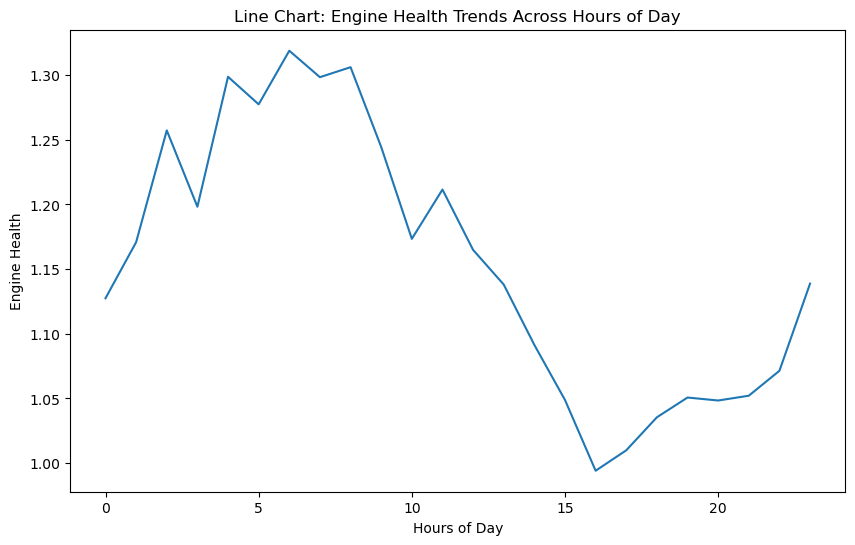

In [30]:
# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour_of_Day', y='Engine_Health', data=aircraft_engine, ci=None)
plt.title('Line Chart: Engine Health Trends Across Hours of Day')
plt.xlabel('Hours of Day')
plt.ylabel('Engine Health')
plt.show()

In [46]:
# Summary of Engine Failure
aircraft_engine_failure_summary = (aircraft_engine['Engine_Failure'] == '1').sum()
print("Summary of Engine Failure:")
aircraft_engine_failure_summary

Summary of Engine Failure:


0